## SI 670 Applied Machine Learning, Week 8: PCA (Due 11/09 11:59pm)

For this assignment, you will be revisiting concepts including PCA and Multi-Dimension Scaling.

* This homework is worth 100 points in total. Correct answers and code receive full credit, but partial credit will be awarded if you have the right idea even if your final answers aren't quite right.

* Submit your completed notebook file to the Canvas site - **IMPORTANT**: please name your submitted file `si670f22-hw8b-youruniqname.ipynb`

* Any file submitted after the deadline will be marked as late. Please consult the syllabus regarding late submission policies. You can submit the homework as many time as you want, but only your latest submission will be graded.

* As a reminder, the notebook code you submit must be your own work. Feel free to discuss general approaches to the homework with classmates. If you end up forming more of a team discussion on multiple questions, please include the names of the people you worked with at the top of your notebook file.



### Question 1 (50 points)
For this problem, you will be applying cross-validation to find the best classifier for the breast cancer dataset after reducing its dimensionality using PCA. The classifier we will be using for this problem is `GradientBoostingClassifier` from scikit-learn. 

We consider the following hyper-parameter values for this classifier:

*   `learning_rate = [0.01, 0.1, 1.0]` for `GradientBoostingClassifier`
*   `n_estimators = [1, 10, 100]` for `GradientBoostingClassifier`
*   `n_components = [2, 5, 10]` for `PCA`

First, build a pipeline that does the following to any input data in order: (i) normalizes data using `StandardScaler`, (ii) reduces dimensionality using `PCA`, and (iii) classifies data using `GradientBoostingClassifier`.

Then, use `GridSearchCV` to run cross-validation and identify the best combination of hyper-parameters (i.e. the best model). Finally, report the best model and test score.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [2]:
# get data, split data
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

# parameter
param_grid = {"clf__learning_rate": [0.01, 0.1, 1.0],
             "clf__n_estimators": [1, 10, 100],
             "pca__n_components": [2, 5, 10]}

# build pipeline
components = [('scaler', StandardScaler()), ('pca', PCA()), ('clf', GradientBoostingClassifier())]
pipe = Pipeline(components)

# grid search a pipeline
grid = GridSearchCV(pipe, param_grid)

# GridSearchCV itself can be viewed as a classifier, can implement .fit and .score functions
# tune with GridSearchCV
grid.fit(X_train, y_train)
test_score = grid.score(X_test, y_test)

# best parameters
best_learning_rate = grid.best_params_['clf__learning_rate']
best_n_estimators = grid.best_params_['clf__n_estimators']
best_n_components = grid.best_params_['pca__n_components']

print('The best parameters (i.e. best model) is having: \n learning_rate:', best_learning_rate,
      ', n_estimators', best_n_estimators, 
      ', n_components',best_n_components)
print('The test score is:', test_score)

The best parameters (i.e. best model) is having: 
 learning_rate: 1.0 , n_estimators 100 , n_components 10
The test score is: 0.9020979020979021


### Question 2 (25 points)

For this problem, you will be applying PCA on the Iris dataset to find the first two principal components.


(150, 4) (150, 2)


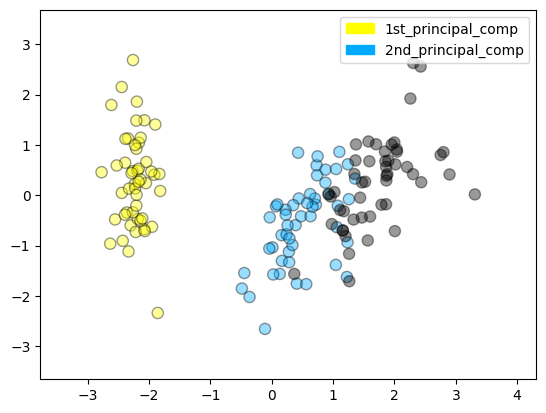

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris


(X_iris, y_iris) = load_iris(return_X_y = True)

X_normalized = StandardScaler().fit(X_iris).transform(X_iris)

pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)

print(X_iris.shape, X_pca.shape)


from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca, y_iris, ['1st_principal_comp', '2nd_principal_comp']) ## Add the labels in the place of the last empty array

### Question 3 (25 points)

For this problem, you will be applying PCA on a synthetic dataset with 10 features, and plot two graphs

1) Data points before applying PCA  
2) Data points after applying PCA

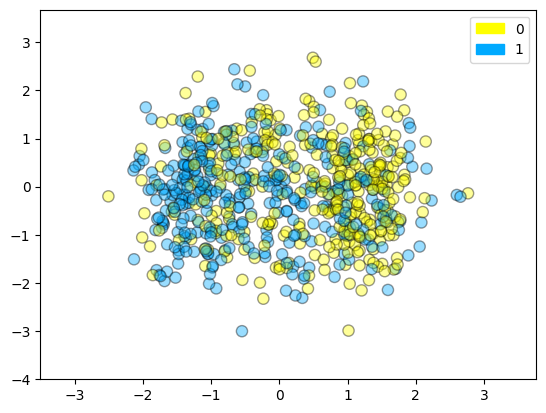

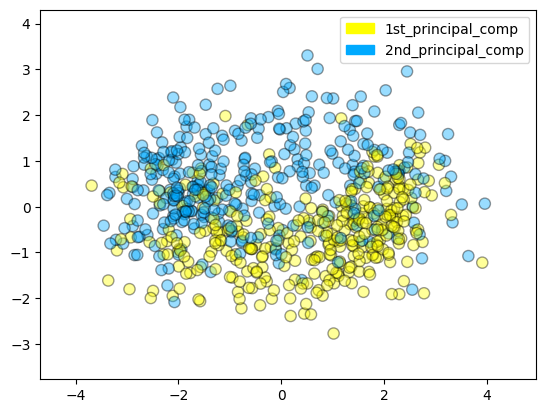

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_moons, make_circles, make_classification

X, y = make_classification(n_samples = 700, n_features=10, random_state=0)
# print(y)

X_normalized = StandardScaler().fit(X).transform(X)
pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)


from adspy_shared_utilities import plot_labelled_scatter

plot_labelled_scatter(X, y, ['0','1']) ## Add the labels in the place of the last empty array
plot_labelled_scatter(X_pca, y, ['1st_principal_comp', '2nd_principal_comp'])  ## Add the labels in the place of the last empty array

In [ ]:
### done